<a href="https://colab.research.google.com/github/kushalk20/Deep-Learning/blob/main/Deep_Learning_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import pandas as pd # For Data Manipulation
import numpy as np   # For Data Manipulation
import matplotlib.pyplot as plt  # For Data Visualization
import seaborn as sns      # For Data Visualization
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.utils import plot_model

import warnings
warnings.filterwarnings("ignore")

In [40]:
df = pd.read_csv("https://raw.githubusercontent.com/kushalk20/Datasets/main/energy_dataset.csv")

In [41]:
df

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 19:00:00+01:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,...,277.0,0.0,3113.0,96.0,NaN,3253.0,30619.0,30653.0,68.85,77.02
35060,2018-12-31 20:00:00+01:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,...,280.0,0.0,3288.0,51.0,NaN,3353.0,29932.0,29735.0,68.40,76.16
35061,2018-12-31 21:00:00+01:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,...,286.0,0.0,3503.0,36.0,NaN,3404.0,27903.0,28071.0,66.88,74.30
35062,2018-12-31 22:00:00+01:00,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,...,287.0,0.0,3586.0,29.0,NaN,3273.0,25450.0,25801.0,63.93,69.89



This dataset contains 4 years of electrical consumption, generation, pricing, and weather data

DATA PRE-PROCESSING

In [5]:
# Finding the total unique values, Null values & percentage of Null values ine each column

dtypes = pd.DataFrame(df.dtypes,columns=["Data Type"])

dtypes["Unique Values"]=df.nunique()

dtypes["Null Values"]=df.isnull().sum()

dtypes["% null Values"]=df.isnull().sum()/len(df)

dtypes.sort_values(by="Null Values" , ascending=False).style.background_gradient(cmap='YlOrRd',axis=0)

,Data Type,Unique Values,Null Values,% null Values
generation hydro pumped storage aggregated,float64,0,35064,1.000000
forecast wind offshore eday ahead,float64,0,35064,1.000000
total load actual,float64,15127,36,0.001027
generation waste,float64,262,19,0.000542
generation biomass,float64,423,19,0.000542
generation hydro pumped storage consumption,float64,3311,19,0.000542
generation marine,float64,1,19,0.000542
generation hydro run-of-river and poundage,float64,1684,19,0.000542
generation fossil oil,float64,321,19,0.000542
generation fossil peat,float64,1,18,0.000513


In [42]:
#droping the columns which have more than 50% null values:
for clm in df.columns:
    if df[clm].isnull().sum()>17000:
        df.drop(clm,axis=1,inplace=True)
df

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,49.0,196.0,0.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,50.0,195.0,0.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,50.0,196.0,0.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,50.0,191.0,0.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,42.0,189.0,0.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 19:00:00+01:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,...,85.0,277.0,0.0,3113.0,96.0,3253.0,30619.0,30653.0,68.85,77.02
35060,2018-12-31 20:00:00+01:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,...,33.0,280.0,0.0,3288.0,51.0,3353.0,29932.0,29735.0,68.40,76.16
35061,2018-12-31 21:00:00+01:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,...,31.0,286.0,0.0,3503.0,36.0,3404.0,27903.0,28071.0,66.88,74.30
35062,2018-12-31 22:00:00+01:00,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,...,31.0,287.0,0.0,3586.0,29.0,3273.0,25450.0,25801.0,63.93,69.89


In [43]:
#Set data type time to date data frame

df["time"]=pd.to_datetime(df["time"], utc=True)
df.dtypes

time                                           datetime64[ns, UTC]
generation biomass                                         float64
generation fossil brown coal/lignite                       float64
generation fossil coal-derived gas                         float64
generation fossil gas                                      float64
generation fossil hard coal                                float64
generation fossil oil                                      float64
generation fossil oil shale                                float64
generation fossil peat                                     float64
generation geothermal                                      float64
generation hydro pumped storage consumption                float64
generation hydro run-of-river and poundage                 float64
generation hydro water reservoir                           float64
generation marine                                          float64
generation nuclear                                         flo

In [44]:
df = df.set_index('time')

In [45]:
# Linear Interpolate the missing values in the dataset
df.interpolate(method='ffill', limit_direction='forward', inplace=True, axis=0)

In [46]:
df.isnull().sum()

generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil coal-derived gas             0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation fossil oil shale                    0
generation fossil peat                         0
generation geothermal                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation marine                              0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind offshore                       0
generation wind onshore                        0
forecast solar day a

In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
generation biomass,35064.0,383.532797,85.346455,0.00,333.0000,367.00,433.00,592.00
generation fossil brown coal/lignite,35064.0,448.091918,354.616732,0.00,0.0000,509.00,757.00,999.00
generation fossil coal-derived gas,35064.0,0.000000,0.000000,0.00,0.0000,0.00,0.00,0.00
generation fossil gas,35064.0,5622.705653,2201.557635,0.00,4126.0000,4969.50,6429.00,20034.00
generation fossil hard coal,35064.0,4256.550622,1961.973297,0.00,2527.0000,4475.00,5839.00,8359.00
generation fossil oil,35064.0,298.341319,52.518371,0.00,263.0000,300.00,330.00,449.00
generation fossil oil shale,35064.0,0.000000,0.000000,0.00,0.0000,0.00,0.00,0.00
generation fossil peat,35064.0,0.000000,0.000000,0.00,0.0000,0.00,0.00,0.00
generation geothermal,35064.0,0.000000,0.000000,0.00,0.0000,0.00,0.00,0.00
generation hydro pumped storage consumption,35064.0,475.563997,792.291849,0.00,0.0000,68.00,616.00,4523.00


Since the Columns 'generation fossil coal-derived gas', 'generation fossil oil shale', 'generation fossil peat','generation geothermal', 'generation geothermal', 'generation wind offshore' & 'generation marine' have all values zero, so we will remove these columns also.

In [48]:
df_cln = df.drop(['generation fossil coal-derived gas', 'generation fossil oil shale', 'generation fossil peat','generation geothermal',
                   'generation geothermal','generation wind offshore','generation marine'], axis = 1)
df_cln

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
time,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41
2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92
2015-01-01 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48
2015-01-01 02:00:00+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32
2015-01-01 03:00:00+00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 18:00:00+00:00,297.0,0.0,7634.0,2628.0,178.0,1.0,1135.0,4836.0,6073.0,63.0,95.0,85.0,277.0,3113.0,96.0,3253.0,30619.0,30653.0,68.85,77.02
2018-12-31 19:00:00+00:00,296.0,0.0,7241.0,2566.0,174.0,1.0,1172.0,3931.0,6074.0,62.0,95.0,33.0,280.0,3288.0,51.0,3353.0,29932.0,29735.0,68.40,76.16
2018-12-31 20:00:00+00:00,292.0,0.0,7025.0,2422.0,168.0,50.0,1148.0,2831.0,6076.0,61.0,94.0,31.0,286.0,3503.0,36.0,3404.0,27903.0,28071.0,66.88,74.30


In [49]:
df_cln.nunique()

generation biomass                               423
generation fossil brown coal/lignite             956
generation fossil gas                           8297
generation fossil hard coal                     7266
generation fossil oil                            321
generation hydro pumped storage consumption     3311
generation hydro run-of-river and poundage      1684
generation hydro water reservoir                7029
generation nuclear                              2388
generation other                                 103
generation other renewable                        78
generation solar                                5331
generation waste                                 262
generation wind onshore                        11465
forecast solar day ahead                        5356
forecast wind onshore day ahead                11332
total load forecast                            14790
total load actual                              15127
price day ahead                               

All the variables seems to be continuous, so we can standardize all of them

DATA VISUALIZATION

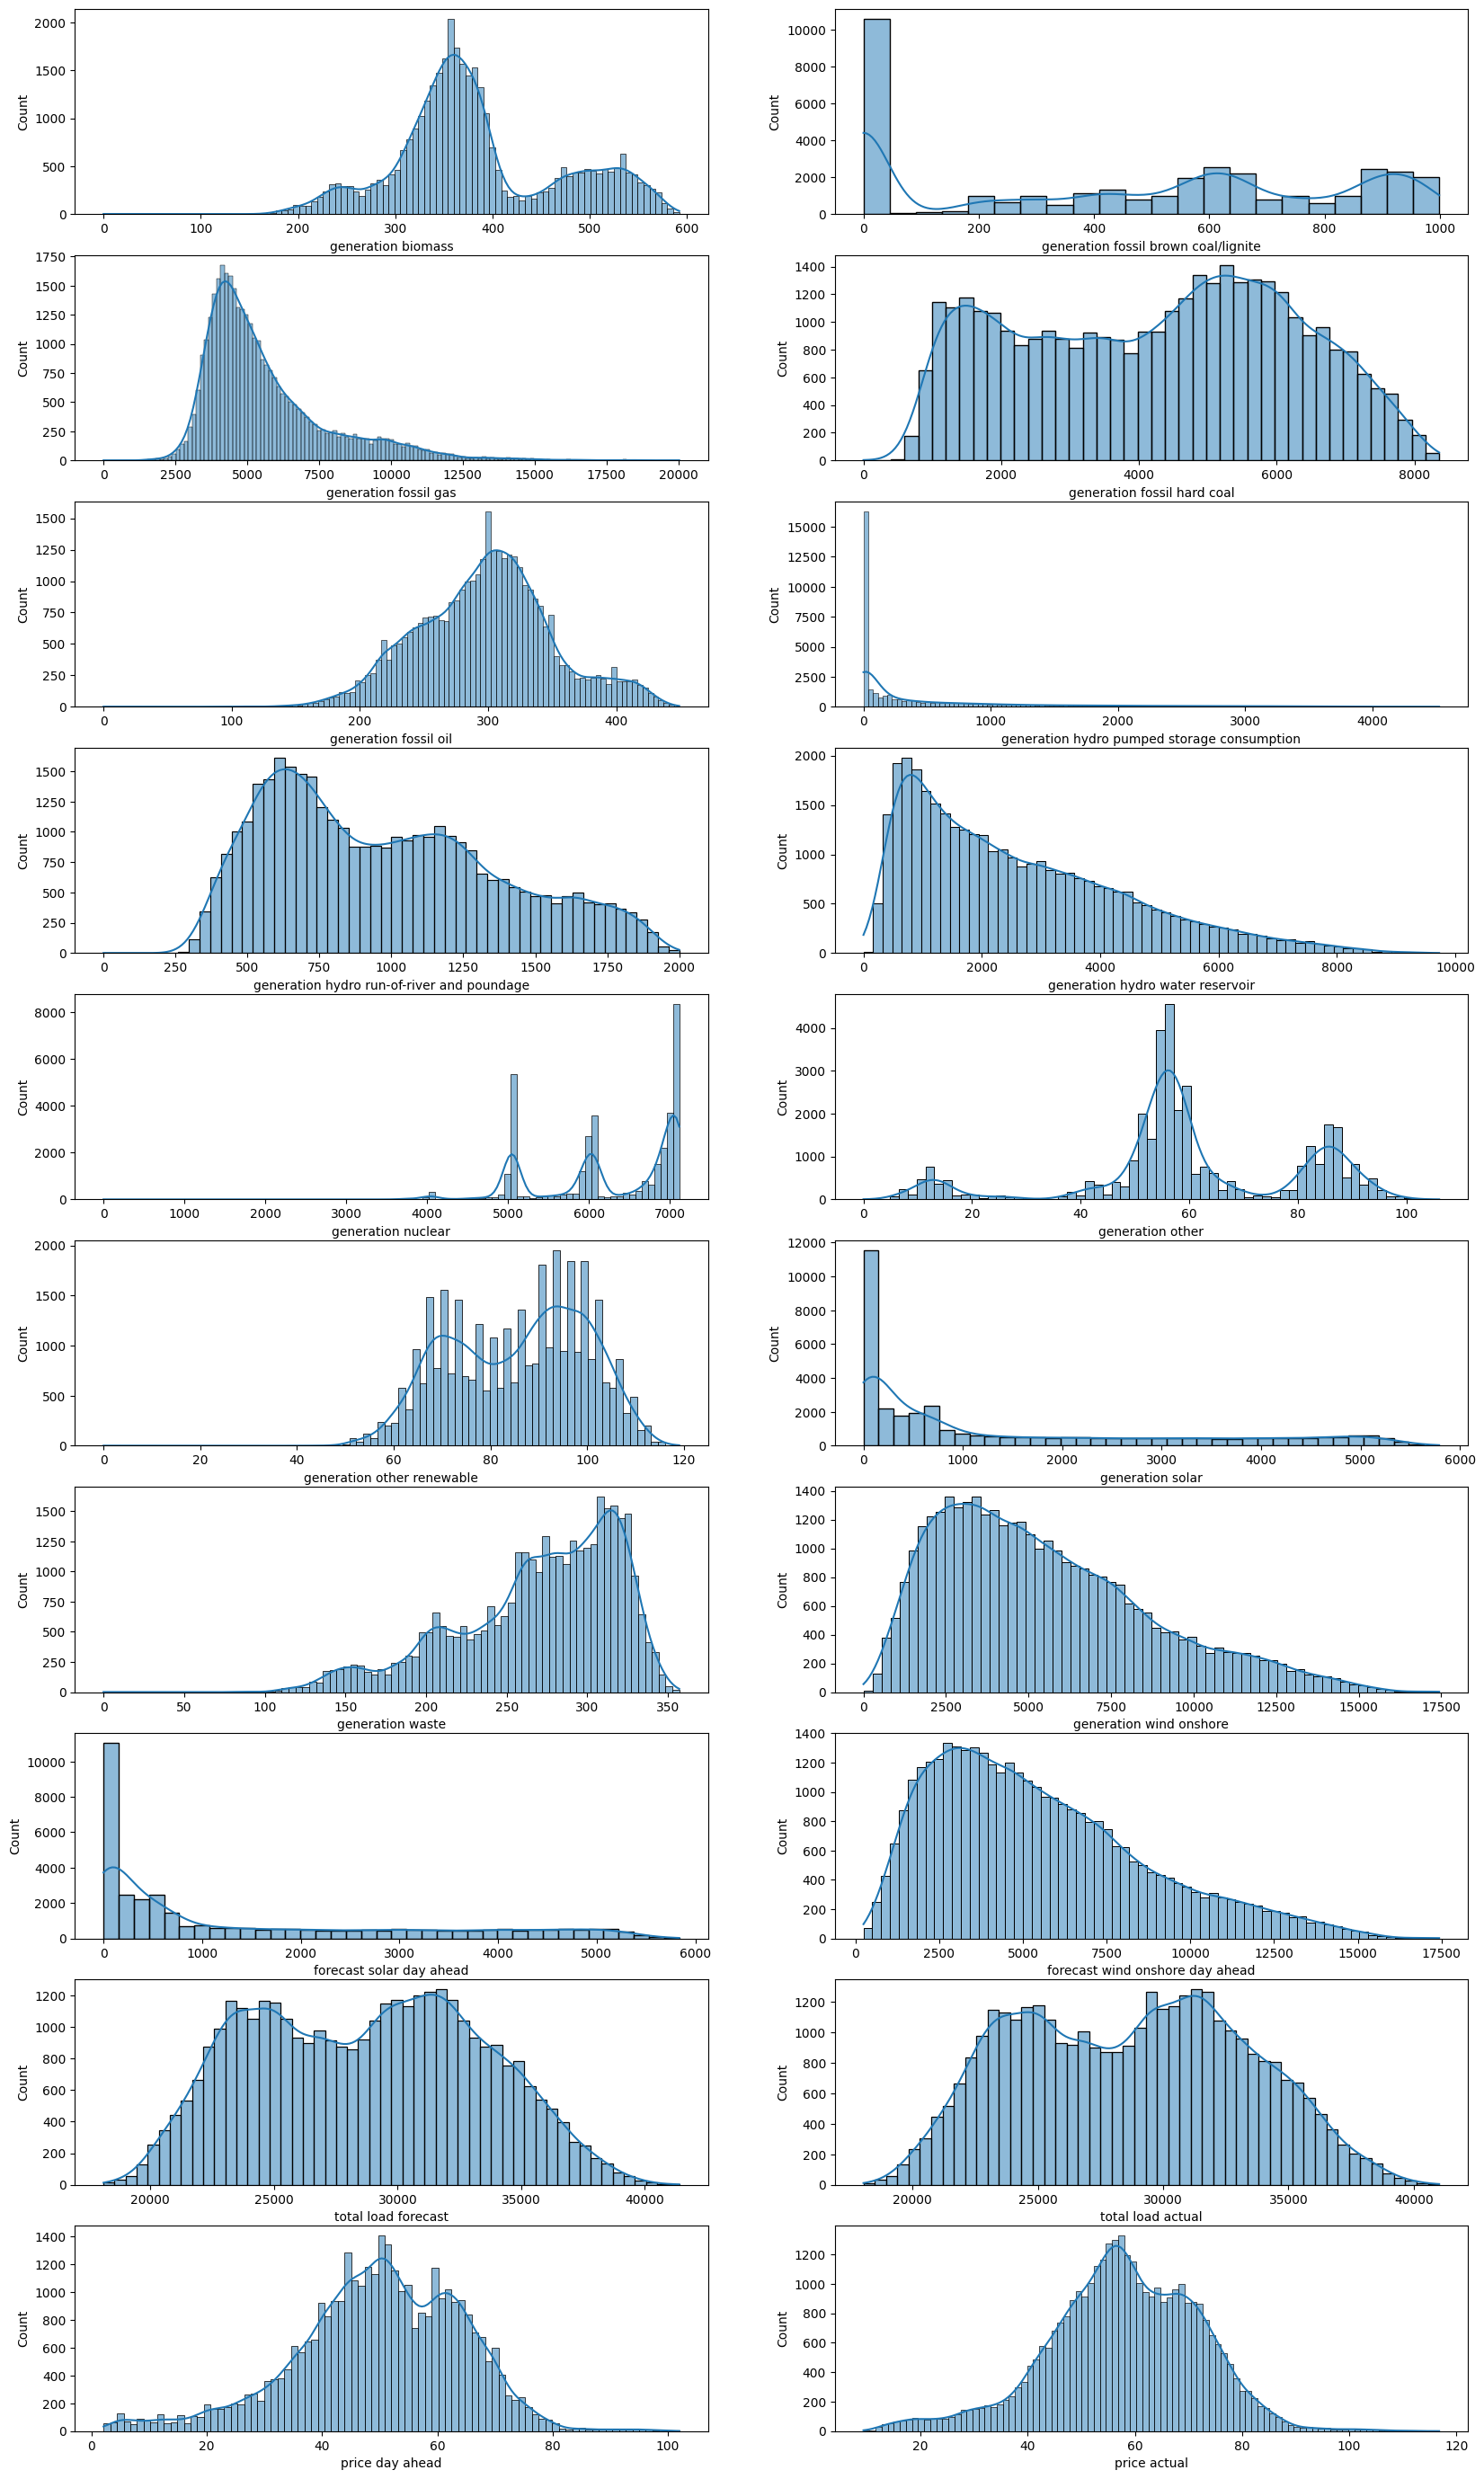

In [50]:
plt.figure(figsize=(20,35))
for i, col in enumerate(df_cln.columns):
    if df_cln[col].dtype != 'object':
        ax = plt.subplot(10, 2, i+1)
        sns.histplot(df_cln[col], ax=ax, kde=True)
        plt.xlabel(col)

plt.show()

[]

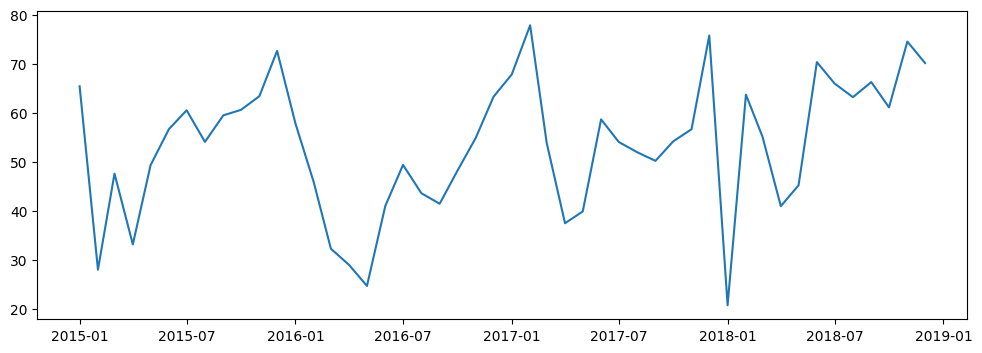

In [51]:
# Plot the electricity prie (month wise) along with 1st year lagg
monthly_price = df_cln['price actual'].asfreq('M')
lagged = monthly_price.shift(12)
plt.figure(figsize=(12,4))
plt.plot(monthly_price, label = 'Monthly Price')
plt.plot()

As there are spikes in the data after every fixed interval, we can say there is some seasonal patterns

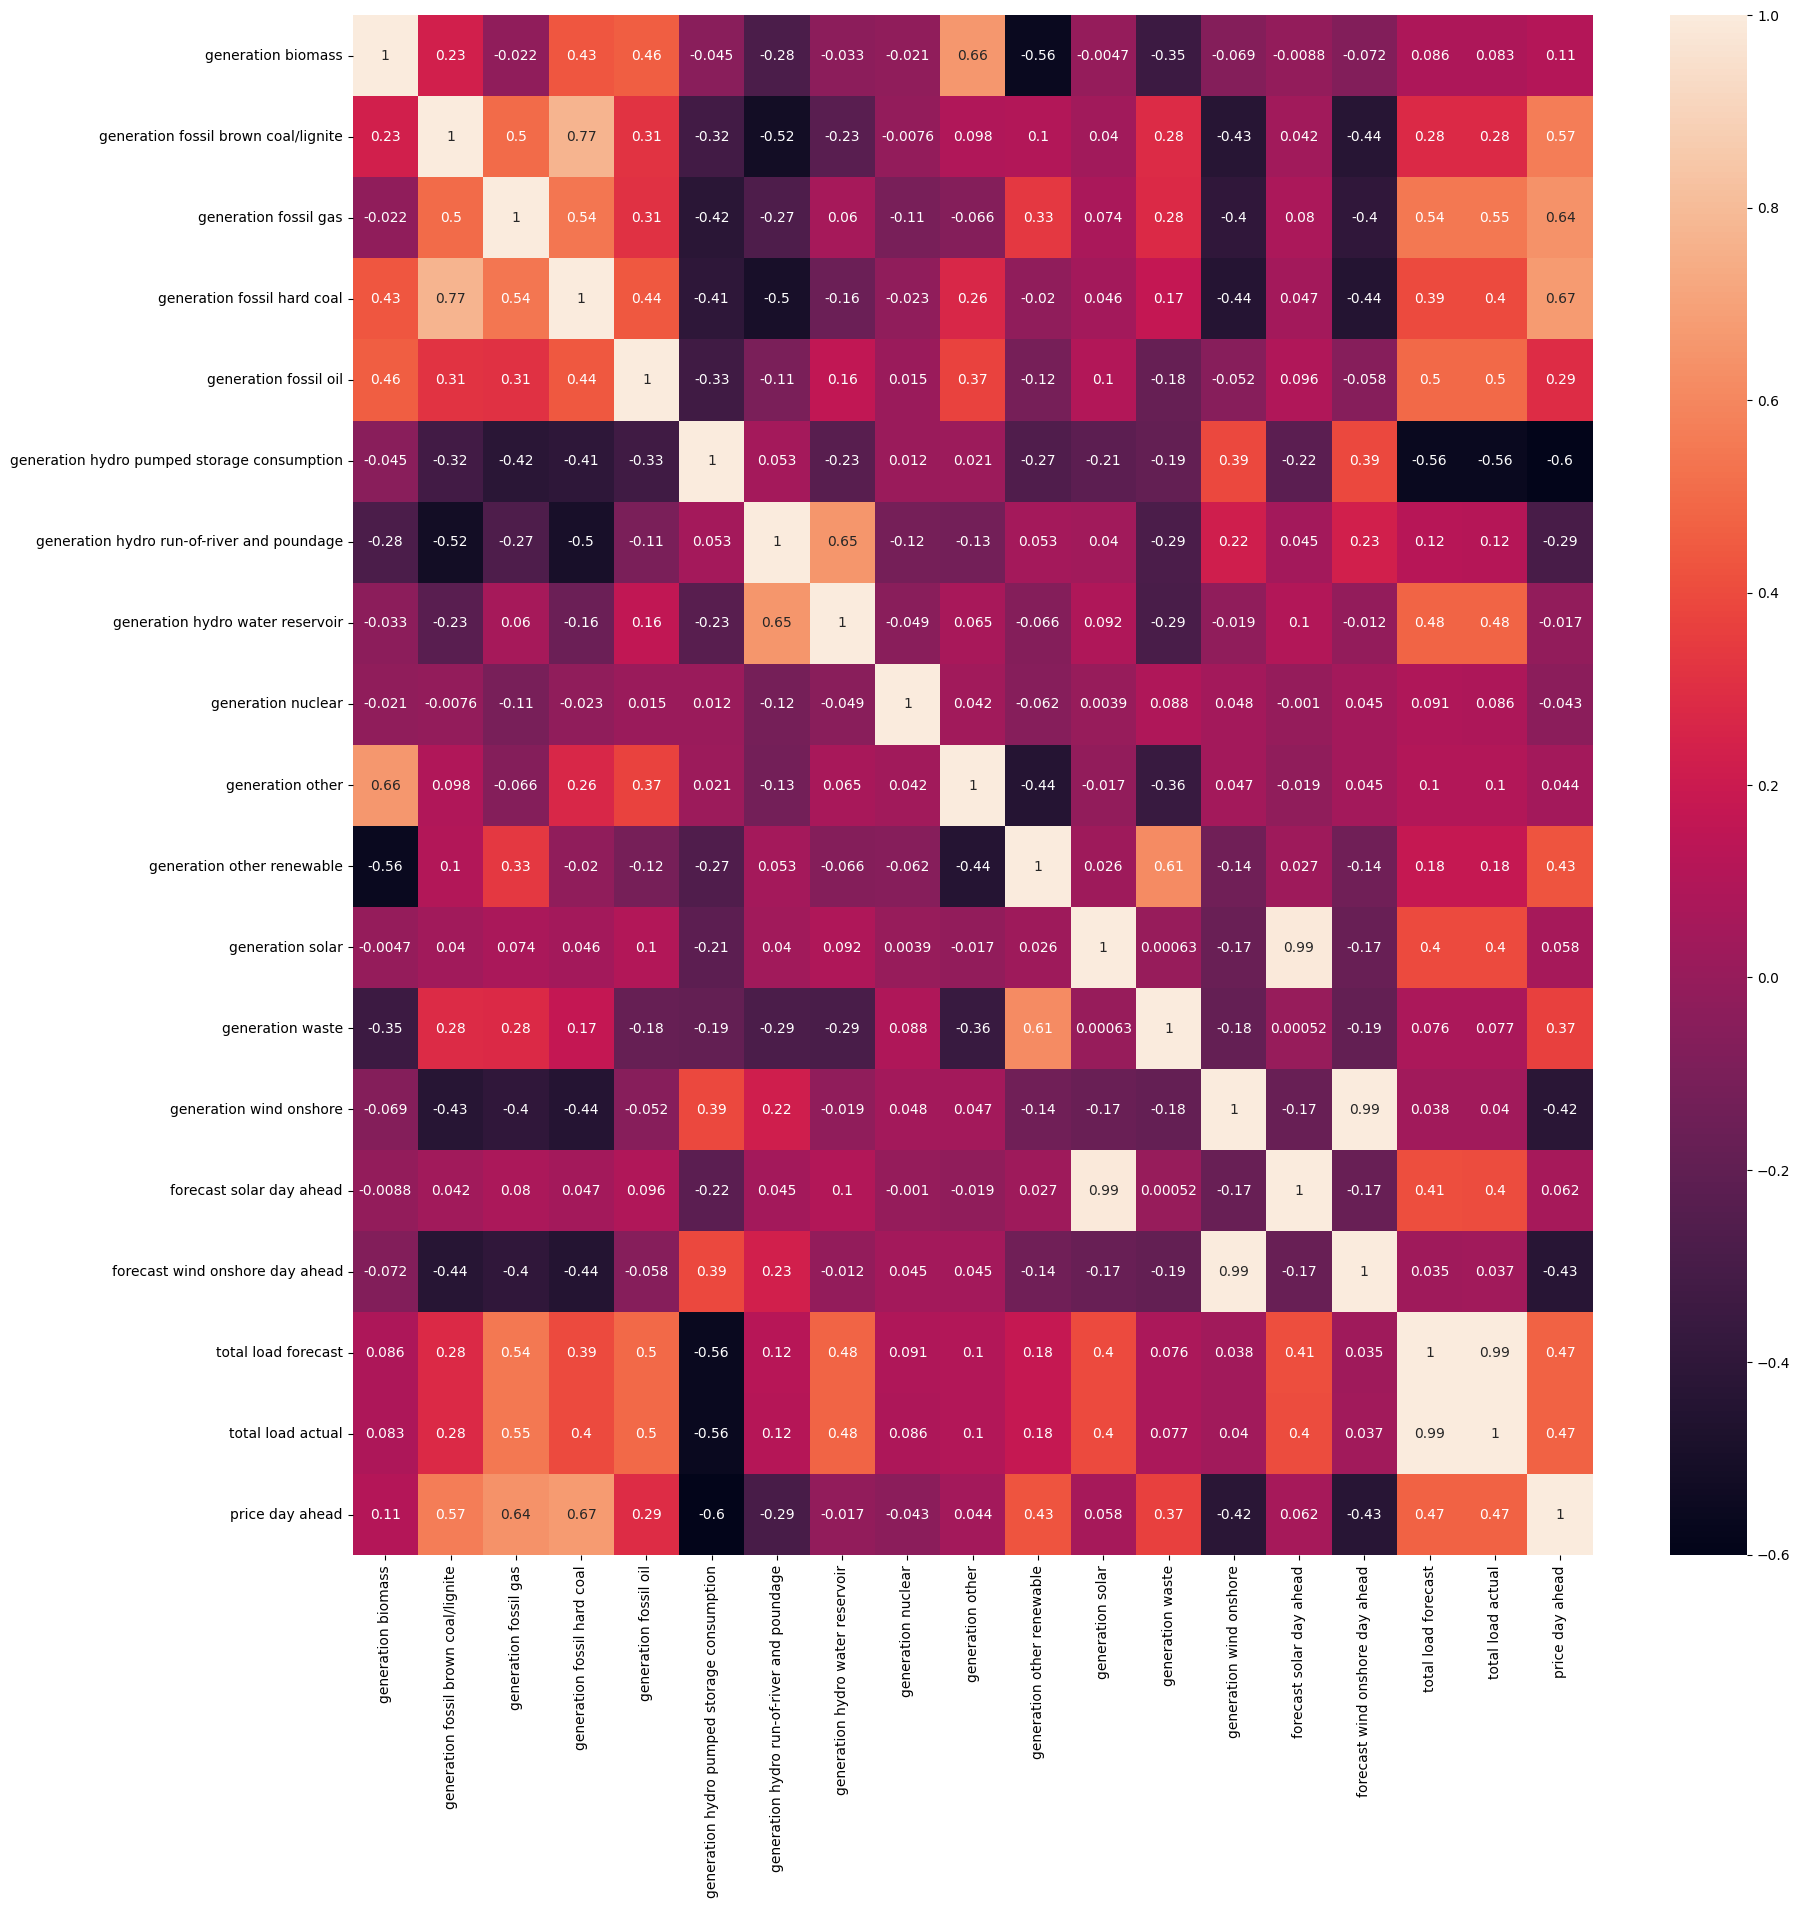

In [167]:
plt.figure(figsize=(20,20))
sns.heatmap(df_cln.corr(), annot=True)
plt.show()

In [64]:
# Pop out target
y = df_cln.pop('price actual')

In [65]:
df_cln.shape

(35064, 19)

In [137]:
X_train,X_test, y_train,y_test = train_test_split(df_cln, y, test_size = 0.25)

In [138]:
print(X_train.shape)
print(X_test.shape)

(26298, 19)
(8766, 19)


In [140]:
mm = MinMaxScaler()
mm.fit(X_train)

MinMaxScaler()

In [141]:
X_train = mm.transform(X_train)
X_test = mm.transform(X_test)

MODEL BUILDING

In [159]:
model = tf.keras.Sequential()

In [160]:
model.add( tf.keras.layers.Input(shape = (19,) ))

In [161]:
model.add(tf.keras.layers.Dense(3000, activation = 'relu'))
model.add(tf.keras.layers.Dense(2048, activation = 'relu'))
model.add(tf.keras.layers.Dense(1500, activation = 'relu'))
model.add(tf.keras.layers.Dense(800, activation = 'relu'))
model.add(tf.keras.layers.Dense(512, activation = 'relu'))
model.add(tf.keras.layers.Dense(250, activation = 'relu'))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(32, activation = 'relu'))
model.add(tf.keras.layers.Dense(1, activation = 'relu'))

In [162]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_74 (Dense)            (None, 3000)              60000     
                                                                 
 dense_75 (Dense)            (None, 2048)              6146048   
                                                                 
 dense_76 (Dense)            (None, 1500)              3073500   
                                                                 
 dense_77 (Dense)            (None, 800)               1200800   
                                                                 
 dense_78 (Dense)            (None, 512)               410112    
                                                                 
 dense_79 (Dense)            (None, 250)               128250    
                                                                 
 dense_80 (Dense)            (None, 128)              

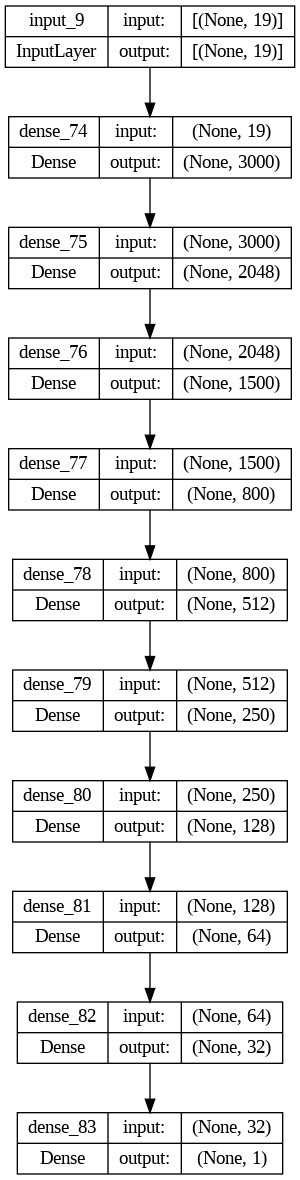

In [163]:
plot_model(model, show_shapes=True)

In [164]:
model.compile(
                 optimizer='adam',
                 loss = 'mae',
              )

In [165]:
history= model.fit(X_train,y_train,epochs=50)

Epoch 1/50
822/822 [==============================] - 135s 162ms/step - loss: 8.3640
Epoch 2/50
822/822 [==============================] - 133s 162ms/step - loss: 6.4751
Epoch 3/50
822/822 [==============================] - 132s 160ms/step - loss: 6.1530
Epoch 4/50
822/822 [==============================] - 133s 162ms/step - loss: 6.2366
Epoch 5/50
822/822 [==============================] - 127s 155ms/step - loss: 6.1319
Epoch 6/50
822/822 [==============================] - 132s 161ms/step - loss: 6.0181
Epoch 7/50
822/822 [==============================] - 132s 161ms/step - loss: 5.9723
Epoch 8/50
822/822 [==============================] - 128s 156ms/step - loss: 6.0626
Epoch 9/50
822/822 [==============================] - 129s 157ms/step - loss: 5.8654
Epoch 10/50
822/822 [==============================] - 134s 163ms/step - loss: 5.7811
Epoch 11/50
822/822 [==============================] - 133s 162ms/step - loss: 5.7780
Epoch 12/50
822/822 [==============================] - 132s 161

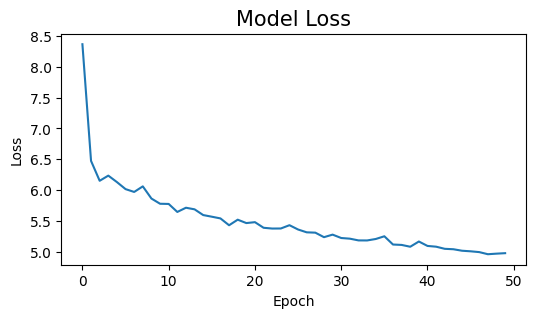

In [169]:
plt.figure(figsize=[6, 3])

# Summarize history for loss
plt.plot(history.history['loss'])
plt.title('Model Loss', size=15)
plt.ylabel('Loss', size=10)
plt.xlabel('Epoch', size=10)

plt.show()